In [ ]:
!pythion --version

/bin/bash: line 1: pythion: command not found


In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
img1 = cv2.imread('/content/gdrive/My Drive/ColabIP/Images/lena.jpg')
img2 = cv2.imread('/content/gdrive/My Drive/ColabIP/Images/lena-mask.bmp')

In [ ]:
RGB_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
RGB_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
output_img = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

In [ ]:
R_img1,G_img1,B_img1 = cv2.split(RGB_img1)
R_img2,G_img2,B_img2 = cv2.split(RGB_img2)

In [ ]:
R_plus=np.zeros((RGB_img1.shape[0], RGB_img1.shape[1]),dtype=np.ubyte)
G_plus=np.zeros((RGB_img1.shape[0], RGB_img1.shape[1]),dtype=np.ubyte)
B_plus=np.zeros((RGB_img1.shape[0], RGB_img1.shape[1]),dtype=np.ubyte)

In [ ]:
def saturation(value):
  if(value>255):
    value = 255;
  return value

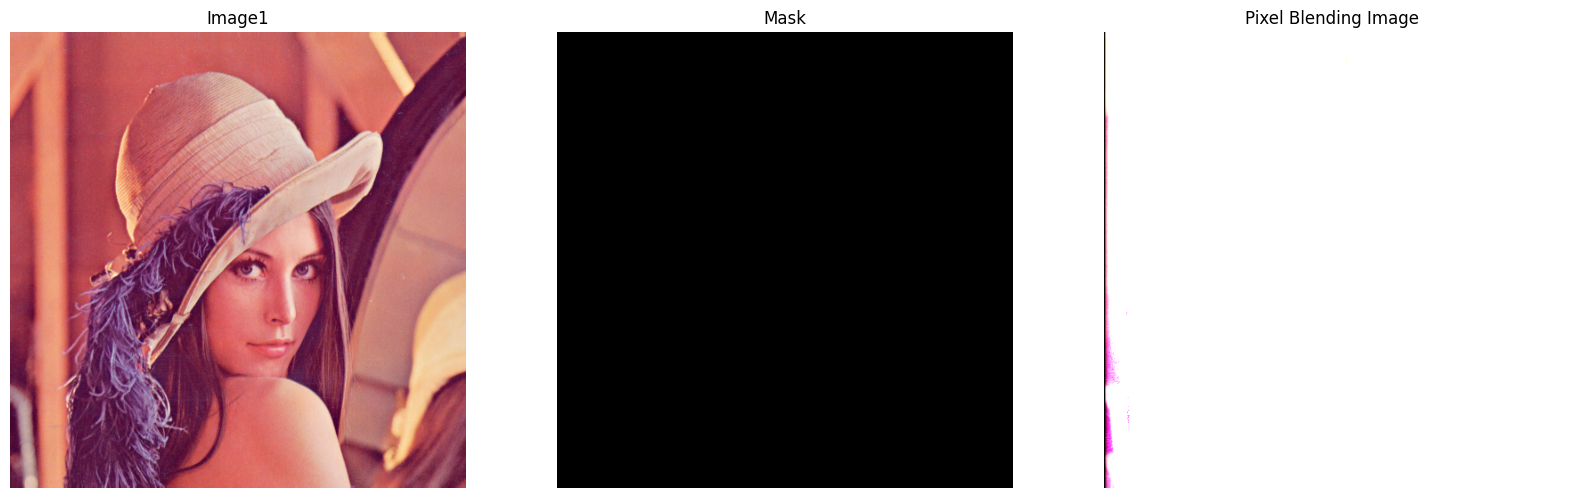

In [ ]:
for h in range(RGB_img1.shape[0]):
  for w in range(RGB_img1.shape[1]):
    if(np.int32(R_img1[h,w])<=0):
      R_img2[h,w]=G_img2[h,w]=B_img2[h,w]=255
    else:
      R_img2[h,w]=G_img2[h,w]=B_img2[h,w]=0

for h in range(RGB_img1.shape[0]):
  for w in range(RGB_img1.shape[1]):
    R_plus[h,w]=saturation(np.int32(R_img1[h,w])& np.int32(R_img2[h,w]))
    G_plus[h,w]=saturation(np.int32(G_img1[h,w])& np.int32(G_img2[h,w]))
    B_plus[h,w]=saturation(np.int32(B_img1[h,w])& np.int32(B_img2[h,w]))

for h in range(RGB_img1.shape[0]):
  for w in range(RGB_img1.shape[1]):
    R_plus[h,w]=saturation(w*np.float32(R_img1[h,w]) + (1-w)*np.float32(R_img2[h,w]))
    G_plus[h,w]=saturation(w*np.float32(G_img1[h,w]) + (1-w)*np.float32(G_img2[h,w]))
    B_plus[h,w]=saturation(w*np.float32(B_img1[h,w]) + (1-w)*np.float32(B_img2[h,w]))

RGB_img1[:,:,0] = R_img1
RGB_img1[:,:,1] = G_img1
RGB_img1[:,:,2] = B_img1

RGB_img2[:,:,0] = R_img2
RGB_img2[:,:,1] = G_img2
RGB_img2[:,:,2] = B_img2

plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.title("Image1")
plt.imshow(RGB_img1)
plt.axis("off")
plt.subplot(1,3,2)
plt.title("Mask")
plt.imshow(RGB_img2)
plt.axis("off")
plt.subplot(1,3,3)
output_img[:,:,0]=R_plus
output_img[:,:,1]=G_plus
output_img[:,:,2]=B_plus
plt.title("Pixel Blending Image")
plt.imshow(output_img)
plt.axis("off")
plt.show()